In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import torch
import torch.nn as nn
import torch.optim as optim

from utils import seed
from data import dataset
from model.backbone import VGG16, ResNet34
from model import basic_classifier
from utils import train

seed.seed_everything()

In [2]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(device)

cuda:0


# VGG

In [7]:
# (already downloaded) dataset path 
path = './data'

train_loader, val_loader, test_loader = dataset.load_pcam(path=path, 
                                                          input_shape=96,
                                                          augmentation=True,
                                                          normalize=True,
                                                          batch_size=256,
                                                          seed=21)

In [8]:
backbone = VGG16.VGG16_Backbone(pretrain=True).to(device=device)
model = basic_classifier.BasicClassifier(backbone=backbone, 
                                         freezing=True, 
                                         num_classes=1).to(device=device)

print(model)

BasicClassifier(
  (backbone): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0

In [9]:
# Warm-up stage 
# 0 ~ 10 epochs
EPOCHS = 10

criterion = nn.BCELoss()
# higher lr for warm-up
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-3)

history = {'train_loss' : [],
           'val_loss': [],
           'train_accuracy': [],
           'val_accuracy': []}
           
max_loss = np.inf

In [10]:
for epoch in range(EPOCHS):
    train_loss, train_acc = train.model_train(model=model, 
                                              data_loader=train_loader, 
                                              criterion=criterion, 
                                              optimizer=optimizer, 
                                              device=device, 
                                              scheduler=None, 
                                              tqdm_disable=False)
    val_loss, val_acc = train.model_evaluate(model=model, 
                                             data_loader=val_loader, 
                                             criterion=criterion, 
                                             device=device)
    
    history['train_loss'].append(train_loss)
    history['train_accuracy'].append(train_acc)
    history['val_loss'].append(val_loss)
    history['val_accuracy'].append(val_acc)

    print(f'epoch {epoch+1:02d}, loss: {train_loss:.5f}, accuracy: {train_acc:.5f}, val_loss: {val_loss:.5f}, val_accuracy: {val_acc:.5f} \n')

100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:08<00:00,  1.87it/s]


epoch 01, loss: 0.41964, accuracy: 0.80840, val_loss: 0.43492, val_accuracy: 0.78830 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:10<00:00,  1.86it/s]


epoch 02, loss: 0.39392, accuracy: 0.82237, val_loss: 0.43046, val_accuracy: 0.79050 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:09<00:00,  1.86it/s]


epoch 03, loss: 0.38826, accuracy: 0.82529, val_loss: 0.43797, val_accuracy: 0.79388 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:08<00:00,  1.87it/s]


epoch 04, loss: 0.38531, accuracy: 0.82659, val_loss: 0.42292, val_accuracy: 0.79407 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:09<00:00,  1.86it/s]


epoch 05, loss: 0.38549, accuracy: 0.82757, val_loss: 0.42902, val_accuracy: 0.79407 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:10<00:00,  1.86it/s]


epoch 06, loss: 0.38250, accuracy: 0.82898, val_loss: 0.42937, val_accuracy: 0.79254 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:07<00:00,  1.87it/s]


epoch 07, loss: 0.38193, accuracy: 0.82906, val_loss: 0.42552, val_accuracy: 0.79675 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:10<00:00,  1.86it/s]


epoch 08, loss: 0.38150, accuracy: 0.82930, val_loss: 0.42134, val_accuracy: 0.79703 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:09<00:00,  1.86it/s]


epoch 09, loss: 0.38069, accuracy: 0.82976, val_loss: 0.43093, val_accuracy: 0.78967 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:09<00:00,  1.86it/s]


epoch 10, loss: 0.38032, accuracy: 0.82973, val_loss: 0.41808, val_accuracy: 0.79602 



In [11]:
# freezing True -> False 
for param in model.backbone.parameters():
    param.requires_grad = True

In [12]:
# Fine-tuning stage 
# 10 ~ 50 epochs
EPOCHS = 40

criterion = nn.BCELoss()
# lower lr for fine-tuning
optimizer = optim.Adam(model.parameters(), lr=5e-4, weight_decay=1e-3)
es = train.EarlyStopping(patience=EPOCHS//2, delta=0, mode='min', verbose=True)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=EPOCHS//5, gamma=0.9)

history = {'train_loss' : [],
           'val_loss': [],
           'train_accuracy': [],
           'val_accuracy': []}
           
max_loss = np.inf    

In [13]:
for epoch in range(EPOCHS):
    train_loss, train_acc = train.model_train(model=model, 
                                              data_loader=train_loader, 
                                              criterion=criterion, 
                                              optimizer=optimizer, 
                                              device=device, 
                                              scheduler=scheduler, 
                                              tqdm_disable=False)
    val_loss, val_acc = train.model_evaluate(model=model, 
                                             data_loader=val_loader, 
                                             criterion=criterion, 
                                             device=device)
    
    history['train_loss'].append(train_loss)
    history['train_accuracy'].append(train_acc)
    history['val_loss'].append(val_loss)
    history['val_accuracy'].append(val_acc)
    
    es(val_loss)
    # Early Stop Check
    if es.early_stop:
        break

    if val_loss < max_loss:
        print(f'[INFO] val_loss has been improved from {max_loss:.5f} to {val_loss:.5f}. Save model.')
        max_loss = val_loss
        torch.save(model.state_dict(), 'Best_Model_VGG_2.pth')

    print(f'epoch {epoch+1:02d}, loss: {train_loss:.5f}, accuracy: {train_acc:.5f}, val_loss: {val_loss:.5f}, val_accuracy: {val_acc:.5f} \n')

100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [13:27<00:00,  1.27it/s]


[EarlyStopping] (Update) Best Score: 0.69317
[INFO] val_loss has been improved from inf to 0.69317. Save model.
epoch 01, loss: 0.70582, accuracy: 0.50105, val_loss: 0.69317, val_accuracy: 0.49954 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [13:08<00:00,  1.30it/s]


[EarlyStopping] (Update) Best Score: 0.69315
[INFO] val_loss has been improved from 0.69317 to 0.69315. Save model.
epoch 02, loss: 0.69285, accuracy: 0.50060, val_loss: 0.69315, val_accuracy: 0.49954 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [13:10<00:00,  1.30it/s]


[EarlyStopping] (Update) Best Score: 0.69269
[INFO] val_loss has been improved from 0.69315 to 0.69269. Save model.
epoch 03, loss: 0.69306, accuracy: 0.49938, val_loss: 0.69269, val_accuracy: 0.50046 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [13:07<00:00,  1.30it/s]


[EarlyStopping] (Patience) 1/20, Best: 0.69269, Current: 0.69319, Delta: 0.00050
epoch 04, loss: 0.69253, accuracy: 0.50109, val_loss: 0.69319, val_accuracy: 0.49954 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [13:10<00:00,  1.30it/s]


[EarlyStopping] (Patience) 2/20, Best: 0.69269, Current: 0.69315, Delta: 0.00046
epoch 05, loss: 0.69326, accuracy: 0.49859, val_loss: 0.69315, val_accuracy: 0.49954 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [13:07<00:00,  1.30it/s]


[EarlyStopping] (Patience) 3/20, Best: 0.69269, Current: 0.69315, Delta: 0.00046
epoch 06, loss: 0.69318, accuracy: 0.50062, val_loss: 0.69315, val_accuracy: 0.49954 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [13:10<00:00,  1.30it/s]


[EarlyStopping] (Update) Best Score: 0.44220
[INFO] val_loss has been improved from 0.69269 to 0.44220. Save model.
epoch 07, loss: 0.62029, accuracy: 0.59626, val_loss: 0.44220, val_accuracy: 0.78955 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [13:09<00:00,  1.30it/s]


[EarlyStopping] (Update) Best Score: 0.44089
[INFO] val_loss has been improved from 0.44220 to 0.44089. Save model.
epoch 08, loss: 0.38295, accuracy: 0.83972, val_loss: 0.44089, val_accuracy: 0.79968 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [13:08<00:00,  1.30it/s]


[EarlyStopping] (Update) Best Score: 0.42151
[INFO] val_loss has been improved from 0.44089 to 0.42151. Save model.
epoch 09, loss: 0.34424, accuracy: 0.85749, val_loss: 0.42151, val_accuracy: 0.81442 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [13:07<00:00,  1.30it/s]


[EarlyStopping] (Update) Best Score: 0.38568
[INFO] val_loss has been improved from 0.42151 to 0.38568. Save model.
epoch 10, loss: 0.31933, accuracy: 0.87058, val_loss: 0.38568, val_accuracy: 0.82376 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [13:07<00:00,  1.30it/s]


[EarlyStopping] (Update) Best Score: 0.37766
[INFO] val_loss has been improved from 0.38568 to 0.37766. Save model.
epoch 11, loss: 0.29874, accuracy: 0.88056, val_loss: 0.37766, val_accuracy: 0.83450 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [13:10<00:00,  1.30it/s]


[EarlyStopping] (Patience) 1/20, Best: 0.37766, Current: 0.39181, Delta: 0.01415
epoch 12, loss: 0.28617, accuracy: 0.88622, val_loss: 0.39181, val_accuracy: 0.83047 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [13:09<00:00,  1.30it/s]


[EarlyStopping] (Patience) 2/20, Best: 0.37766, Current: 0.38601, Delta: 0.00835
epoch 13, loss: 0.27318, accuracy: 0.89164, val_loss: 0.38601, val_accuracy: 0.83536 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [13:08<00:00,  1.30it/s]


[EarlyStopping] (Patience) 3/20, Best: 0.37766, Current: 0.45411, Delta: 0.07645
epoch 14, loss: 0.25970, accuracy: 0.89843, val_loss: 0.45411, val_accuracy: 0.81564 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [13:07<00:00,  1.30it/s]


[EarlyStopping] (Update) Best Score: 0.37299
[INFO] val_loss has been improved from 0.37766 to 0.37299. Save model.
epoch 15, loss: 0.25228, accuracy: 0.90098, val_loss: 0.37299, val_accuracy: 0.84442 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [13:09<00:00,  1.30it/s]


[EarlyStopping] (Patience) 1/20, Best: 0.37299, Current: 0.39820, Delta: 0.02521
epoch 16, loss: 0.24718, accuracy: 0.90374, val_loss: 0.39820, val_accuracy: 0.83395 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [13:09<00:00,  1.30it/s]


[EarlyStopping] (Update) Best Score: 0.34889
[INFO] val_loss has been improved from 0.37299 to 0.34889. Save model.
epoch 17, loss: 0.23625, accuracy: 0.90839, val_loss: 0.34889, val_accuracy: 0.85388 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [13:07<00:00,  1.30it/s]


[EarlyStopping] (Patience) 1/20, Best: 0.34889, Current: 0.42818, Delta: 0.07929
epoch 18, loss: 0.23240, accuracy: 0.91005, val_loss: 0.42818, val_accuracy: 0.84430 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [13:07<00:00,  1.30it/s]


[EarlyStopping] (Patience) 2/20, Best: 0.34889, Current: 0.41336, Delta: 0.06447
epoch 19, loss: 0.22698, accuracy: 0.91281, val_loss: 0.41336, val_accuracy: 0.84262 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [13:08<00:00,  1.30it/s]


[EarlyStopping] (Patience) 3/20, Best: 0.34889, Current: 0.36787, Delta: 0.01898
epoch 20, loss: 0.22267, accuracy: 0.91463, val_loss: 0.36787, val_accuracy: 0.85675 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [13:09<00:00,  1.30it/s]


[EarlyStopping] (Patience) 4/20, Best: 0.34889, Current: 0.48202, Delta: 0.13313
epoch 21, loss: 0.22239, accuracy: 0.91428, val_loss: 0.48202, val_accuracy: 0.80429 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [13:07<00:00,  1.30it/s]


[EarlyStopping] (Patience) 5/20, Best: 0.34889, Current: 0.36519, Delta: 0.01630
epoch 22, loss: 0.21551, accuracy: 0.91732, val_loss: 0.36519, val_accuracy: 0.85614 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [13:09<00:00,  1.30it/s]


[EarlyStopping] (Patience) 6/20, Best: 0.34889, Current: 0.40995, Delta: 0.06106
epoch 23, loss: 0.21190, accuracy: 0.91866, val_loss: 0.40995, val_accuracy: 0.84692 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [13:07<00:00,  1.30it/s]


[EarlyStopping] (Patience) 7/20, Best: 0.34889, Current: 0.46655, Delta: 0.11766
epoch 24, loss: 0.21154, accuracy: 0.91969, val_loss: 0.46655, val_accuracy: 0.81873 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [13:07<00:00,  1.30it/s]


[EarlyStopping] (Patience) 8/20, Best: 0.34889, Current: 0.40925, Delta: 0.06036
epoch 25, loss: 0.20704, accuracy: 0.92099, val_loss: 0.40925, val_accuracy: 0.84708 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [13:08<00:00,  1.30it/s]


[EarlyStopping] (Patience) 9/20, Best: 0.34889, Current: 0.46835, Delta: 0.11946
epoch 26, loss: 0.20334, accuracy: 0.92178, val_loss: 0.46835, val_accuracy: 0.83612 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [13:09<00:00,  1.30it/s]


[EarlyStopping] (Patience) 10/20, Best: 0.34889, Current: 0.40506, Delta: 0.05617
epoch 27, loss: 0.20380, accuracy: 0.92241, val_loss: 0.40506, val_accuracy: 0.85828 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [13:07<00:00,  1.30it/s]


[EarlyStopping] (Patience) 11/20, Best: 0.34889, Current: 0.44963, Delta: 0.10074
epoch 28, loss: 0.20167, accuracy: 0.92373, val_loss: 0.44963, val_accuracy: 0.84418 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [13:08<00:00,  1.30it/s]


[EarlyStopping] (Patience) 12/20, Best: 0.34889, Current: 0.37633, Delta: 0.02744
epoch 29, loss: 0.19909, accuracy: 0.92445, val_loss: 0.37633, val_accuracy: 0.85764 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [13:08<00:00,  1.30it/s]


[EarlyStopping] (Patience) 13/20, Best: 0.34889, Current: 0.45443, Delta: 0.10554
epoch 30, loss: 0.19907, accuracy: 0.92502, val_loss: 0.45443, val_accuracy: 0.83444 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [13:08<00:00,  1.30it/s]


[EarlyStopping] (Patience) 14/20, Best: 0.34889, Current: 0.37135, Delta: 0.02246
epoch 31, loss: 0.19820, accuracy: 0.92501, val_loss: 0.37135, val_accuracy: 0.85129 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [13:09<00:00,  1.30it/s]


[EarlyStopping] (Patience) 15/20, Best: 0.34889, Current: 0.51165, Delta: 0.16276
epoch 32, loss: 0.19481, accuracy: 0.92639, val_loss: 0.51165, val_accuracy: 0.82266 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [13:06<00:00,  1.30it/s]


[EarlyStopping] (Patience) 16/20, Best: 0.34889, Current: 0.38674, Delta: 0.03785
epoch 33, loss: 0.19278, accuracy: 0.92695, val_loss: 0.38674, val_accuracy: 0.85599 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [13:08<00:00,  1.30it/s]


[EarlyStopping] (Patience) 17/20, Best: 0.34889, Current: 0.36033, Delta: 0.01144
epoch 34, loss: 0.19370, accuracy: 0.92731, val_loss: 0.36033, val_accuracy: 0.85526 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [13:08<00:00,  1.30it/s]


[EarlyStopping] (Patience) 18/20, Best: 0.34889, Current: 0.40105, Delta: 0.05216
epoch 35, loss: 0.19024, accuracy: 0.92890, val_loss: 0.40105, val_accuracy: 0.84955 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [13:09<00:00,  1.30it/s]


[EarlyStopping] (Patience) 19/20, Best: 0.34889, Current: 0.43634, Delta: 0.08745
epoch 36, loss: 0.18892, accuracy: 0.92888, val_loss: 0.43634, val_accuracy: 0.83511 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [13:09<00:00,  1.30it/s]


[EarlyStopping] (Patience) 20/20, Best: 0.34889, Current: 0.38395, Delta: 0.03506
[EarlyStop Triggered] Best Score: 0.34889


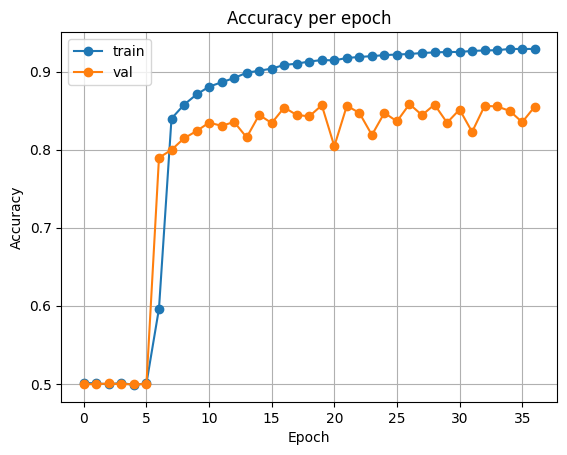

In [14]:
train.plot_acc(history=history)

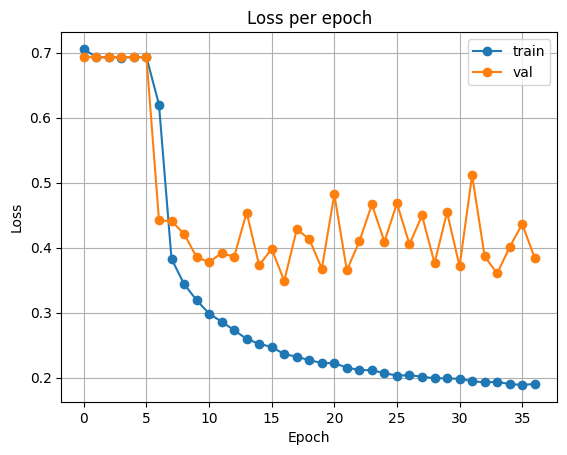

In [15]:
train.plot_loss(history=history)

In [16]:
backbone = VGG16.VGG16_Backbone(pretrain=False).to(device=device)
model = basic_classifier.BasicClassifier(backbone=backbone, 
                                         freezing=True, 
                                         num_classes=1).to(device=device)

model.load_state_dict(torch.load('Best_Model_VGG_2.pth', map_location=device))
model.eval()

test_loss, test_acc = train.model_evaluate(model=model,
                                           data_loader=test_loader,
                                           criterion=criterion,
                                           device=device)

print('Test Loss: %s'%test_loss)
print('Test Accuracy: %s'%test_acc)

Test Loss: 0.42586067761294544
Test Accuracy: 0.833648681640625


# ResNet

In [17]:
train_loader, val_loader, test_loader = dataset.load_pcam(path=path, 
                                                          input_shape=96,
                                                          augmentation=True,
                                                          normalize=True,
                                                          batch_size=256,
                                                          seed=21)

In [18]:
backbone = ResNet34.ResNet34_Backbone(pretrain=True).to(device=device)
model = basic_classifier.BasicClassifier(backbone=backbone, 
                                         freezing=True, 
                                         num_classes=1).to(device=device)

print(model)

BasicClassifier(
  (backbone): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_st

In [19]:
# Warm-up stage 
# 0 ~ 10 epochs
EPOCHS = 10

criterion = nn.BCELoss()
# higher lr for warm-up
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-3)

history = {'train_loss' : [],
           'val_loss': [],
           'train_accuracy': [],
           'val_accuracy': []}

max_loss = np.inf

In [20]:
for epoch in range(EPOCHS):
    train_loss, train_acc = train.model_train(model=model, 
                                              data_loader=train_loader, 
                                              criterion=criterion, 
                                              optimizer=optimizer, 
                                              device=device, 
                                              scheduler=None, 
                                              tqdm_disable=False)
    val_loss, val_acc = train.model_evaluate(model=model, 
                                             data_loader=val_loader, 
                                             criterion=criterion, 
                                             device=device)
    
    history['train_loss'].append(train_loss)
    history['train_accuracy'].append(train_acc)
    history['val_loss'].append(val_loss)
    history['val_accuracy'].append(val_acc)

    print(f'epoch {epoch+1:02d}, loss: {train_loss:.5f}, accuracy: {train_acc:.5f}, val_loss: {val_loss:.5f}, val_accuracy: {val_acc:.5f} \n')

100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [07:54<00:00,  2.16it/s]


epoch 01, loss: 0.42279, accuracy: 0.80595, val_loss: 0.41722, val_accuracy: 0.79977 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [07:54<00:00,  2.16it/s]


epoch 02, loss: 0.39465, accuracy: 0.82263, val_loss: 0.40410, val_accuracy: 0.80759 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [07:52<00:00,  2.17it/s]


epoch 03, loss: 0.38974, accuracy: 0.82631, val_loss: 0.40724, val_accuracy: 0.80386 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [07:53<00:00,  2.16it/s]


epoch 04, loss: 0.38514, accuracy: 0.82820, val_loss: 0.40563, val_accuracy: 0.80920 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [07:53<00:00,  2.16it/s]


epoch 05, loss: 0.38500, accuracy: 0.82854, val_loss: 0.38755, val_accuracy: 0.81607 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [07:54<00:00,  2.16it/s]


epoch 06, loss: 0.38230, accuracy: 0.82991, val_loss: 0.40213, val_accuracy: 0.80664 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [07:53<00:00,  2.16it/s]


epoch 07, loss: 0.38269, accuracy: 0.82992, val_loss: 0.40601, val_accuracy: 0.80295 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [07:53<00:00,  2.16it/s]


epoch 08, loss: 0.38207, accuracy: 0.83060, val_loss: 0.40217, val_accuracy: 0.80859 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [07:55<00:00,  2.16it/s]


epoch 09, loss: 0.38093, accuracy: 0.83153, val_loss: 0.38522, val_accuracy: 0.81879 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [07:53<00:00,  2.16it/s]


epoch 10, loss: 0.38223, accuracy: 0.83081, val_loss: 0.38465, val_accuracy: 0.82211 



In [21]:
# freezing True -> False 
for param in model.backbone.parameters():
    param.requires_grad = True

In [22]:
# Fine-tuning stage 
# 10 ~ 50 epochs
EPOCHS = 40

criterion = nn.BCELoss()
# lower lr for fine-tuning
optimizer = optim.Adam(model.parameters(), lr=5e-4, weight_decay=1e-3)
es = train.EarlyStopping(patience=EPOCHS//2, delta=0, mode='min', verbose=True)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=EPOCHS//5, gamma=0.9)

history = {'train_loss' : [],
           'val_loss': [],
           'train_accuracy': [],
           'val_accuracy': []}
           
max_loss = np.inf    

In [23]:
for epoch in range(EPOCHS):
    train_loss, train_acc = train.model_train(model=model, 
                                              data_loader=train_loader, 
                                              criterion=criterion, 
                                              optimizer=optimizer, 
                                              device=device, 
                                              scheduler=scheduler, 
                                              tqdm_disable=False)
    val_loss, val_acc = train.model_evaluate(model=model, 
                                             data_loader=val_loader, 
                                             criterion=criterion, 
                                             device=device)
    
    history['train_loss'].append(train_loss)
    history['train_accuracy'].append(train_acc)
    history['val_loss'].append(val_loss)
    history['val_accuracy'].append(val_acc)
    
    es(val_loss)
    # Early Stop Check
    if es.early_stop:
        break

    if val_loss < max_loss:
        print(f'[INFO] val_loss has been improved from {max_loss:.5f} to {val_loss:.5f}. Save model.')
        max_loss = val_loss
        torch.save(model.state_dict(), 'Best_Model_ResNet_2.pth')

    print(f'epoch {epoch+1:02d}, loss: {train_loss:.5f}, accuracy: {train_acc:.5f}, val_loss: {val_loss:.5f}, val_accuracy: {val_acc:.5f} \n')

100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:47<00:00,  1.74it/s]


[EarlyStopping] (Update) Best Score: 0.33797
[INFO] val_loss has been improved from inf to 0.33797. Save model.
epoch 01, loss: 0.20944, accuracy: 0.92033, val_loss: 0.33797, val_accuracy: 0.86462 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:43<00:00,  1.76it/s]


[EarlyStopping] (Patience) 1/20, Best: 0.33797, Current: 0.44225, Delta: 0.10427
epoch 02, loss: 0.17518, accuracy: 0.93541, val_loss: 0.44225, val_accuracy: 0.84869 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:45<00:00,  1.75it/s]


[EarlyStopping] (Patience) 2/20, Best: 0.33797, Current: 0.43118, Delta: 0.09321
epoch 03, loss: 0.16119, accuracy: 0.94091, val_loss: 0.43118, val_accuracy: 0.85153 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:43<00:00,  1.76it/s]


[EarlyStopping] (Update) Best Score: 0.32916
[INFO] val_loss has been improved from 0.33797 to 0.32916. Save model.
epoch 04, loss: 0.15000, accuracy: 0.94530, val_loss: 0.32916, val_accuracy: 0.87570 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:46<00:00,  1.75it/s]


[EarlyStopping] (Update) Best Score: 0.27201
[INFO] val_loss has been improved from 0.32916 to 0.27201. Save model.
epoch 05, loss: 0.14314, accuracy: 0.94820, val_loss: 0.27201, val_accuracy: 0.89175 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:44<00:00,  1.75it/s]


[EarlyStopping] (Patience) 1/20, Best: 0.27201, Current: 0.29765, Delta: 0.02564
epoch 06, loss: 0.13675, accuracy: 0.95073, val_loss: 0.29765, val_accuracy: 0.88431 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:45<00:00,  1.75it/s]


[EarlyStopping] (Patience) 2/20, Best: 0.27201, Current: 0.36274, Delta: 0.09073
epoch 07, loss: 0.13457, accuracy: 0.95153, val_loss: 0.36274, val_accuracy: 0.87183 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:43<00:00,  1.75it/s]


[EarlyStopping] (Patience) 3/20, Best: 0.27201, Current: 0.49071, Delta: 0.21870
epoch 08, loss: 0.13019, accuracy: 0.95312, val_loss: 0.49071, val_accuracy: 0.85263 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:44<00:00,  1.75it/s]


[EarlyStopping] (Patience) 4/20, Best: 0.27201, Current: 0.60314, Delta: 0.33113
epoch 09, loss: 0.12644, accuracy: 0.95482, val_loss: 0.60314, val_accuracy: 0.77985 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:42<00:00,  1.76it/s]


[EarlyStopping] (Patience) 5/20, Best: 0.27201, Current: 0.39944, Delta: 0.12743
epoch 10, loss: 0.12318, accuracy: 0.95589, val_loss: 0.39944, val_accuracy: 0.87140 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:44<00:00,  1.75it/s]


[EarlyStopping] (Update) Best Score: 0.26963
[INFO] val_loss has been improved from 0.27201 to 0.26963. Save model.
epoch 11, loss: 0.12225, accuracy: 0.95620, val_loss: 0.26963, val_accuracy: 0.89813 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:45<00:00,  1.75it/s]


[EarlyStopping] (Patience) 1/20, Best: 0.26963, Current: 0.53868, Delta: 0.26904
epoch 12, loss: 0.11950, accuracy: 0.95723, val_loss: 0.53868, val_accuracy: 0.83484 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:45<00:00,  1.75it/s]


[EarlyStopping] (Patience) 2/20, Best: 0.26963, Current: 0.31090, Delta: 0.04127
epoch 13, loss: 0.11814, accuracy: 0.95813, val_loss: 0.31090, val_accuracy: 0.88611 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:41<00:00,  1.76it/s]


[EarlyStopping] (Patience) 3/20, Best: 0.26963, Current: 0.36231, Delta: 0.09268
epoch 14, loss: 0.11761, accuracy: 0.95845, val_loss: 0.36231, val_accuracy: 0.86176 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:42<00:00,  1.76it/s]


[EarlyStopping] (Patience) 4/20, Best: 0.26963, Current: 0.28758, Delta: 0.01794
epoch 15, loss: 0.11720, accuracy: 0.95868, val_loss: 0.28758, val_accuracy: 0.89157 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:44<00:00,  1.75it/s]


[EarlyStopping] (Patience) 5/20, Best: 0.26963, Current: 0.30769, Delta: 0.03806
epoch 16, loss: 0.11557, accuracy: 0.95881, val_loss: 0.30769, val_accuracy: 0.88644 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:43<00:00,  1.76it/s]


[EarlyStopping] (Patience) 6/20, Best: 0.26963, Current: 0.34943, Delta: 0.07979
epoch 17, loss: 0.11098, accuracy: 0.96078, val_loss: 0.34943, val_accuracy: 0.87115 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:43<00:00,  1.75it/s]


[EarlyStopping] (Patience) 7/20, Best: 0.26963, Current: 0.32894, Delta: 0.05931
epoch 18, loss: 0.11159, accuracy: 0.96083, val_loss: 0.32894, val_accuracy: 0.88547 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:44<00:00,  1.75it/s]


[EarlyStopping] (Patience) 8/20, Best: 0.26963, Current: 0.39788, Delta: 0.12825
epoch 19, loss: 0.11036, accuracy: 0.96105, val_loss: 0.39788, val_accuracy: 0.88528 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:44<00:00,  1.75it/s]


[EarlyStopping] (Patience) 9/20, Best: 0.26963, Current: 0.34521, Delta: 0.07558
epoch 20, loss: 0.10912, accuracy: 0.96136, val_loss: 0.34521, val_accuracy: 0.88010 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:41<00:00,  1.76it/s]


[EarlyStopping] (Patience) 10/20, Best: 0.26963, Current: 0.58106, Delta: 0.31143
epoch 21, loss: 0.10872, accuracy: 0.96151, val_loss: 0.58106, val_accuracy: 0.82562 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:44<00:00,  1.75it/s]


[EarlyStopping] (Patience) 11/20, Best: 0.26963, Current: 0.45091, Delta: 0.18127
epoch 22, loss: 0.10905, accuracy: 0.96161, val_loss: 0.45091, val_accuracy: 0.86203 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:44<00:00,  1.75it/s]


[EarlyStopping] (Patience) 12/20, Best: 0.26963, Current: 0.53994, Delta: 0.27030
epoch 23, loss: 0.10798, accuracy: 0.96212, val_loss: 0.53994, val_accuracy: 0.85275 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:44<00:00,  1.75it/s]


[EarlyStopping] (Patience) 13/20, Best: 0.26963, Current: 0.49711, Delta: 0.22747
epoch 24, loss: 0.10837, accuracy: 0.96173, val_loss: 0.49711, val_accuracy: 0.83615 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:42<00:00,  1.76it/s]


[EarlyStopping] (Patience) 14/20, Best: 0.26963, Current: 0.36016, Delta: 0.09053
epoch 25, loss: 0.10430, accuracy: 0.96357, val_loss: 0.36016, val_accuracy: 0.87534 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:43<00:00,  1.75it/s]


[EarlyStopping] (Patience) 15/20, Best: 0.26963, Current: 0.51296, Delta: 0.24333
epoch 26, loss: 0.10305, accuracy: 0.96425, val_loss: 0.51296, val_accuracy: 0.83469 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:42<00:00,  1.76it/s]


[EarlyStopping] (Patience) 16/20, Best: 0.26963, Current: 0.29175, Delta: 0.02212
epoch 27, loss: 0.10280, accuracy: 0.96385, val_loss: 0.29175, val_accuracy: 0.88907 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:43<00:00,  1.76it/s]


[EarlyStopping] (Patience) 17/20, Best: 0.26963, Current: 0.48050, Delta: 0.21086
epoch 28, loss: 0.10458, accuracy: 0.96361, val_loss: 0.48050, val_accuracy: 0.85913 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:43<00:00,  1.75it/s]


[EarlyStopping] (Patience) 18/20, Best: 0.26963, Current: 0.46582, Delta: 0.19618
epoch 29, loss: 0.10168, accuracy: 0.96476, val_loss: 0.46582, val_accuracy: 0.84277 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:42<00:00,  1.76it/s]


[EarlyStopping] (Patience) 19/20, Best: 0.26963, Current: 0.28848, Delta: 0.01884
epoch 30, loss: 0.10151, accuracy: 0.96497, val_loss: 0.28848, val_accuracy: 0.89417 



100%|███████████████████████████████████████████████████████████████████████████| 1024/1024 [09:42<00:00,  1.76it/s]


[EarlyStopping] (Patience) 20/20, Best: 0.26963, Current: 0.35529, Delta: 0.08565
[EarlyStop Triggered] Best Score: 0.26963


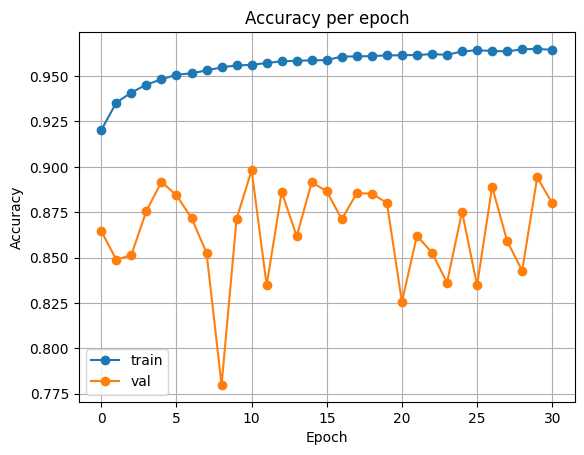

In [24]:
train.plot_acc(history=history)

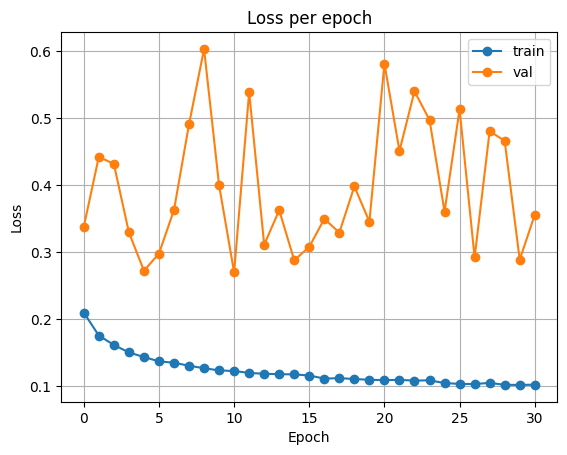

In [25]:
train.plot_loss(history=history)

In [26]:
backbone = ResNet34.ResNet34_Backbone(pretrain=False).to(device=device)
model = basic_classifier.BasicClassifier(backbone=backbone, 
                                         freezing=True, 
                                         num_classes=1).to(device=device)

model.load_state_dict(torch.load('Best_Model_ResNet_2.pth', map_location=device))
model.eval()

test_loss, test_acc = train.model_evaluate(model=model,
                                           data_loader=test_loader,
                                           criterion=criterion,
                                           device=device)

print('Test Loss: %s'%test_loss)
print('Test Accuracy: %s'%test_acc)

Test Loss: 0.4631400341168046
Test Accuracy: 0.8436279296875
